# Libraries 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Dataset

In [ ]:
# Load dataset
df = pd.read_csv("car data.csv")  
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data exploration

In [4]:
# basic
# Check structure
df.info()

# Summary stats
df.describe()

# Check missing values
df.isnull().sum()

# Check first few unique values for categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Car_Name: 98 unique values
Fuel_Type: 3 unique values
Selling_type: 2 unique values
Transmission: 2 unique values


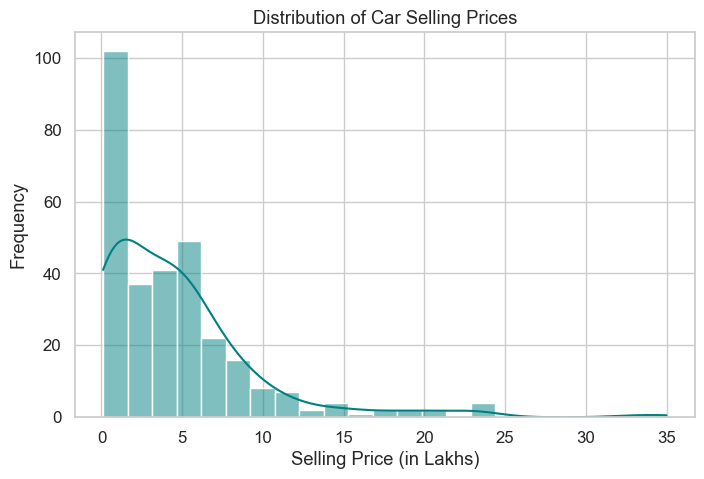

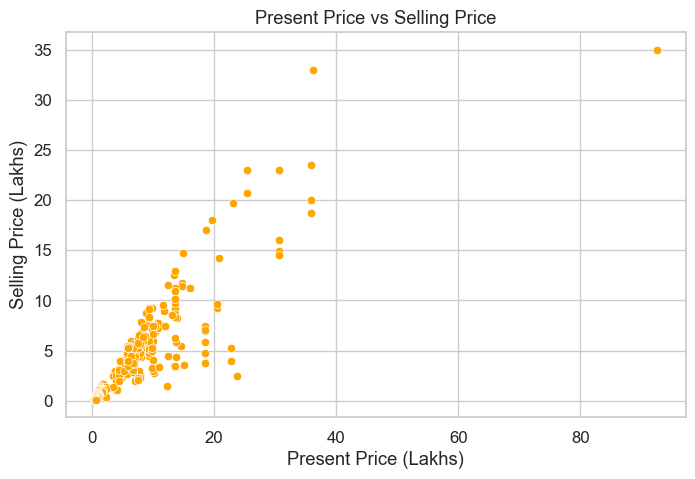

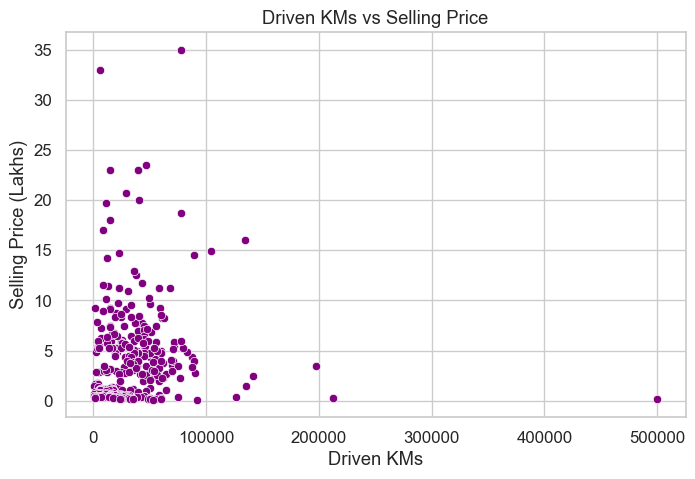

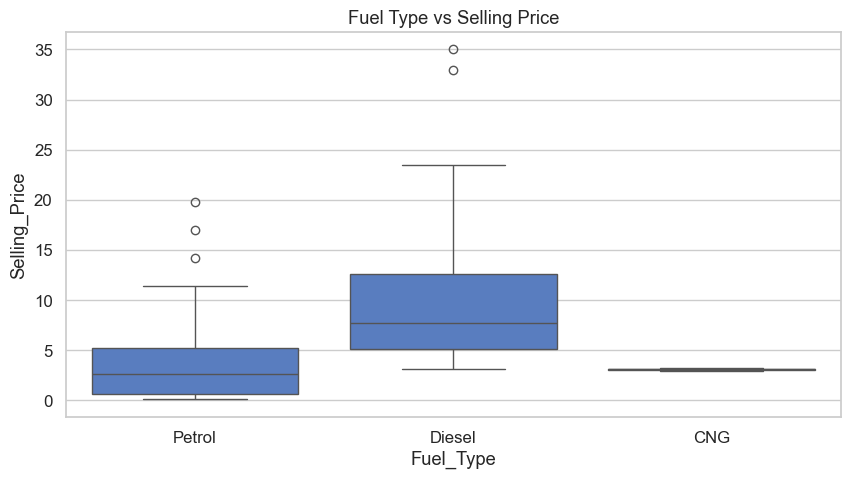

In [9]:
# visual inspection
# Distribution of Selling Prices
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], kde=True, color='teal')
plt.title("Distribution of Car Selling Prices")
plt.xlabel("Selling Price (in Lakhs)")
plt.ylabel("Frequency")
plt.show()

# Relationship between Present_Price and Selling_Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Present_Price', y='Selling_Price', color='orange')
plt.title("Present Price vs Selling Price")
plt.xlabel("Present Price (Lakhs)")
plt.ylabel("Selling Price (Lakhs)")
plt.show()

# Relationship between Driven_kms and Selling_Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price', color='purple')
plt.title("Driven KMs vs Selling Price")
plt.xlabel("Driven KMs")
plt.ylabel("Selling Price (Lakhs)")
plt.show()

# Boxplot for categorical features vs Selling Price
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.title("Fuel Type vs Selling Price")
plt.show()



# Data preprocessing

In [ ]:
# feature engineering
df['Car_Age'] = 2025 - df['Year']

# Drop irrelevant columns
df.drop(['Car_Name', 'Year'], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [11]:
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)
# Features and target variable
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Verify new structure
df.head()



,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


# Model training

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Final Features:")
print(X.columns)

print("\nSample of preprocessed data:")
print(pd.DataFrame(X_train, columns=X.columns).head())



Training data shape: (240, 8)
Testing data shape: (61, 8)
Final Features:
Index(['Present_Price', 'Driven_kms', 'Owner', 'Car_Age', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual'],
      dtype='object')

Sample of preprocessed data:
     Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
184          0.750       26000      1       17             False   
132          0.950        3500      0        8             False   
194          0.787       50000      0       17             False   
75           6.800       36000      0       10             False   
111          1.500        8700      0        9             False   

     Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
184              True                     True                 True  
132              True                     True                 True  
194              True                     True                 True  
75               True        

In [16]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [17]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"📊 {model_name}")
    print(f"R² Score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print("-" * 40)
    return r2, mae, rmse

results = {}
results['Linear Regression'] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
results['Decision Tree'] = evaluate_model(y_test, y_pred_dt, "Decision Tree")
results['Random Forest'] = evaluate_model(y_test, y_pred_rf, "Random Forest")


📊 Linear Regression
R² Score: 0.849
MAE: 1.216
RMSE: 1.866
----------------------------------------
📊 Decision Tree
R² Score: 0.945
MAE: 0.733
RMSE: 1.121
----------------------------------------
📊 Random Forest
R² Score: 0.959
MAE: 0.637
RMSE: 0.966
----------------------------------------


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


                         R²       MAE      RMSE
Linear Regression  0.848871  1.216374  1.865838
Decision Tree      0.945477  0.733443  1.120697
Random Forest      0.959457  0.636866  0.966405


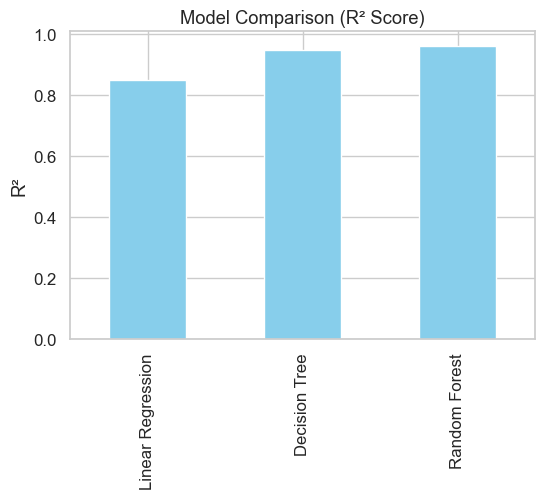

In [19]:


results_df = pd.DataFrame(results, index=['R²', 'MAE', 'RMSE']).T
print(results_df)

# Visualization
results_df[['R²']].plot(kind='bar', color='skyblue', legend=False, figsize=(6,4))
plt.title("Model Comparison (R² Score)")
plt.ylabel("R²")
plt.show()


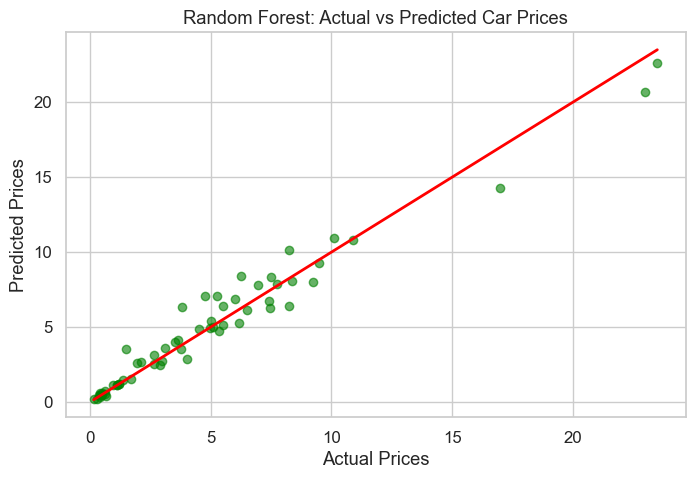

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()


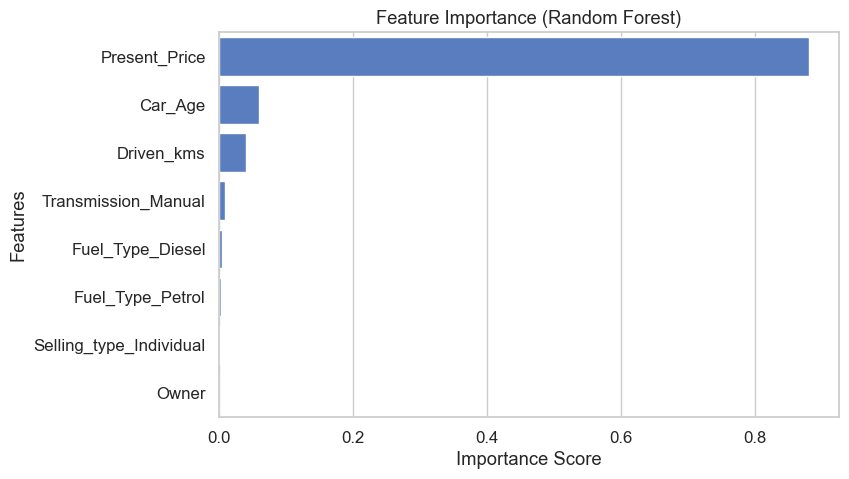

In [21]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Final report 

# Task 3: Car Price Prediction with Machine Learning



## 🧩 Dataset Overview
The dataset contains 301 records with 9 features:
- **Car_Name** — model name  
- **Year** — year of manufacture  
- **Selling_Price** — target variable (in lakhs ₹)  
- **Present_Price** — current market price of the car  
- **Driven_kms** — total kilometers driven  
- **Fuel_Type** — fuel category (Petrol, Diesel, CNG)  
- **Selling_type** — dealer or individual sale  
- **Transmission** — manual or automatic  
- **Owner** — number of previous owners  

---

##  Exploratory Data Analysis (EDA)

### 1. Distribution of Car Prices
Most cars are priced below ₹10 lakhs, with a few luxury outliers up to ₹35L — showing a **right-skewed distribution** typical of used-car markets.

### 2. Present Price vs Selling Price
A clear **positive correlation** exists: cars with higher original market prices retain higher resale values.  
However, depreciation varies across brands and usage levels.

### 3. Driven KMs vs Selling Price
A **negative relationship** appears — the more a car is driven, the lower its resale value.  
Mileage significantly contributes to depreciation.

### 4. Fuel Type vs Selling Price
**Diesel cars** command higher resale prices on average than **Petrol** or **CNG**, possibly due to better fuel economy and engine longevity.

---

##  Feature Engineering & Preprocessing
- Created a new feature: **Car_Age = 2025 - Year**
- Removed `Car_Name` and `Year` as they add little predictive value.
- Encoded categorical columns (`Fuel_Type`, `Selling_type`, `Transmission`) using one-hot encoding.
- Split dataset into **80% training** and **20% testing**.

---

##  Model Training & Evaluation

Three models were trained and compared:

| Model | R² | MAE | RMSE |
|--------|-----|------|------|
| **Linear Regression** | 0.849 | 1.216 | 1.866 |
| **Decision Tree** | 0.945 | 0.733 | 1.121 |
| **Random Forest** | **0.959** | **0.637** | **0.966** |

---

##  Insights from Model Comparison
- **Linear Regression** provided a good baseline (R² ≈ 0.85), but it couldn’t fully capture nonlinear patterns.
- **Decision Tree** improved results significantly but risked slight overfitting.
- **Random Forest Regressor** achieved the best performance with **R² = 0.96**, **MAE ≈ 0.64**, and **RMSE ≈ 0.97**, indicating high accuracy and generalization.


